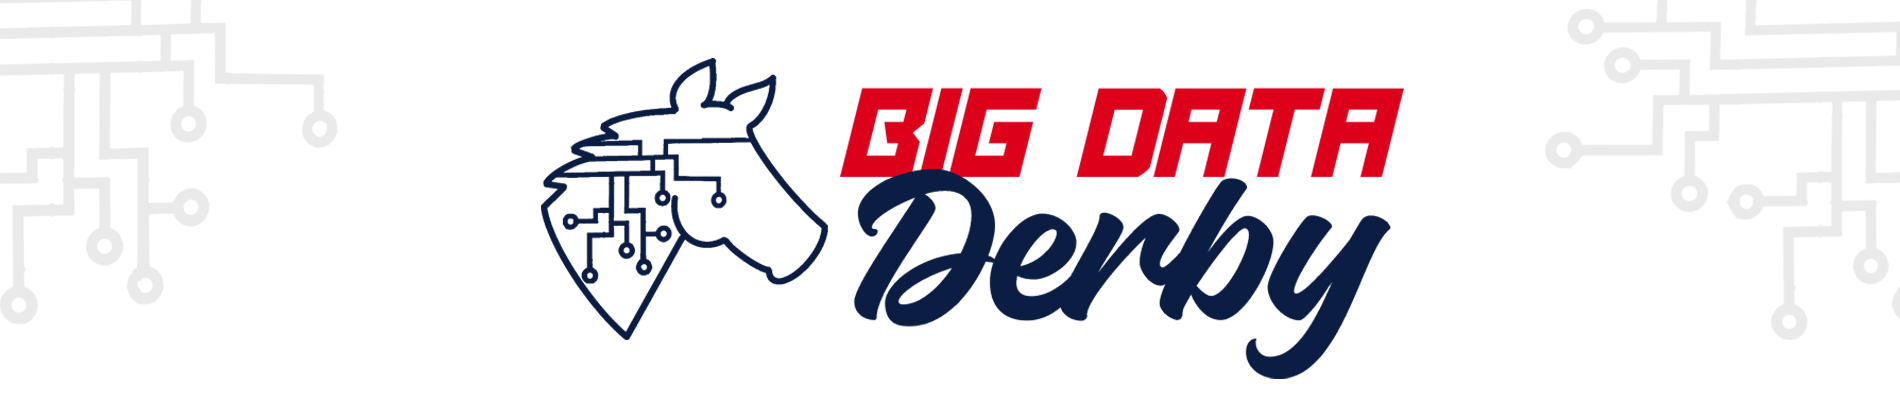

# Context

Injury prevention is a critical component in modern athletics. Sports that involve animals, such as horse racing, are no different than human sport. Typically, efficiency in movement correlates to both improvements in performance and injury prevention.

A wealth of data is now collected, including measures for heart rate, EKG, longitudinal movement, dorsal/ventral movement, medial/lateral deviation, total power and total landing vibration. Your data science skills and analysis are needed to decipher what makes the most positive impact.

In this competition, you will create a model to interpret one aspect of this new data. You’ll be among the first to access X/Y coordinate mapping of horses during races. Using the data, you might analyze jockey decision making, compare race surfaces, or measure the relative importance of drafting. With considerable data, contestants can flex their creativity problem solving skills.

The New York Racing Association (NYRA) and the New York Thoroughbred Horsemen's Association (NYTHA) conduct world class thoroughbred racing at Aqueduct Racetrack, Belmont Park and Saratoga Race Course.

With your help, NYRA and NYTHA will better understand their vast data set, which could lead to new ways of racing and training in a highly traditional industry. With improved use of horse tracking data, you could help improve equine welfare, performance and rider decision making.

# Goal of the Competition

The goal of this competition is to analyze horse racing tactics, drafting strategies, and path efficiency. You will develop a model using never-before-released coordinate data along with basic race information.

Your work will help racing horse owners, trainers, and veterinarians better understand how equine performance and welfare fit together. With better data analysis, equine welfare could significantly improve.

# Data Set Description

`track_id` - 3 character id for the track the race took place at: **AQU** -Aqueduct, **BEL** - Belmont, **SAR** - Saratoga

`race_date` - Date the race took place. YYYY-MM-DD

`race_number` - Number of the race. Passed as 3 characters but can be cast or converted to int for this data set

`program_number` - Program number of the horse in the race passed as 3 characters. Should remain 3 characters as it isn't limited to just numbers. Is essentially the unique identifier of the horse in the race

`weight_carried` - An integer of the weight carried by the horse in the race

`jockey` - Name of the jockey on the horse in the race. 50 character max

`odds` - Odds to win the race passed as an integer. Divide by 100 to derive the odds to 1. Example - 1280 would be 12.8-1

`distance_id` - Distance of the race in furlongs passed as an integer. Example - 600 would be 6 furlongs

`course_type` - The course the race was run over passed as one character. **M** - Hurdle, **D** - Dirt, **O** - Outer turf, **I** - Inner turf, **T** - turf

`track_condition` - The condition of the course the race was run on passed as three characters. **YL** - Yielding, **FM** - Firm, **SY** - Sloppy, **GD** - Good, **FT** - Fast, **MY** - Muddy, **SF** - Soft

`run_up_distance` - Distance in feet of the gate to the start of the race passed as an integer

`race_type` - The classification of the race passed as as five characters. **STK** - Stakes, **WCL** - Waiver Claiming, **WMC** - Waiver Maiden Claiming, **SST** - Starter Stakes, **SHP** - Starter Handicap, **CLM** - Claiming, **STR** - Starter Allowance, **AOC** - Allowance Optional Claimer, **SOC** - Starter Optional Claimer, **MCL** - Maiden Claiming, **ALW** - Allowance, **MSW** - Maiden Special Weight

`purse` - Purse in US dollars of the race passed as an money with two decimal places

`post_time` - Time of day the race began passed as 5 character. Example - 01220 would be 12:20

`trakus_index` - The common collection of point of the lat / long of the horse in the race passed as an integer. From what we can tell, it's collected every 0.25 seconds

`latitude` - The latitude of the horse in the race passed as a float

`longitude` - The longitude of the horse in the race passed as a float

In [1]:
import numpy as np 
import pandas as pd 

import warnings, gc
warnings.filterwarnings("ignore")

In [2]:
nyra_tracking = pd.read_csv("/kaggle/input/big-data-derby-2022/nyra_tracking_table.csv")
nyra_start = pd.read_csv("/kaggle/input/big-data-derby-2022/nyra_start_table.csv")
nyra_race = pd.read_csv("/kaggle/input/big-data-derby-2022/nyra_race_table.csv")
nyra_2019 = pd.read_csv("/kaggle/input/big-data-derby-2022/nyra_2019_complete.csv")

In [3]:
nyra_tracking.head()

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762


In [4]:
nyra_tracking.describe()

,race_number,trakus_index,latitude,longitude
count,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06
mean,5.505409e+00,1.838652e+02,4.120387e+01,-7.377702e+01
std,2.860656e+00,1.183327e+02,9.771227e-01,4.711054e-02
min,1.000000e+00,1.000000e+00,4.066671e+01,-7.383260e+01
25%,3.000000e+00,8.800000e+01,4.067346e+01,-7.382883e+01
50%,6.000000e+00,1.760000e+02,4.071393e+01,-7.376915e+01
75%,8.000000e+00,2.640000e+02,4.071739e+01,-7.372564e+01
max,1.300000e+01,1.062000e+03,4.307399e+01,-7.371483e+01


In [5]:
nyra_tracking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5228430 entries, 0 to 5228429
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   track_id        object 
 1   race_date       object 
 2   race_number     int64  
 3   program_number  object 
 4   trakus_index    int64  
 5   latitude        float64
 6   longitude       float64
dtypes: float64(2), int64(2), object(3)
memory usage: 279.2+ MB


In [6]:
nyra_tracking.track_id.value_counts()

AQU    2158369
BEL    1947134
SAR    1122927
Name: track_id, dtype: int64

In [7]:
nyra_tracking.race_number.value_counts()

8     582413
6     575217
5     559884
7     554623
4     523846
2     515115
1     508808
9     492915
3     490256
10    283141
11     98804
12     31725
13     11683
Name: race_number, dtype: int64

In [8]:
nyra_tracking.program_number.value_counts()

4      611396
3      611025
5      606666
2      602597
1      599979
6      579893
7      486905
8      373202
9      266526
10     186835
11     117532
12      71363
1A      56753
13      26507
14      15081
15       7917
2B       4081
16       3591
3X        334
1X        247
Name: program_number, dtype: int64

In [9]:
nyra_start.head()

,track_id,race_date,race_number,program_number,weight_carried,jockey,odds
0,AQU,2019-01-01,1,1,123,Dylan Davis,130
1,AQU,2019-01-01,1,2,120,Junior Alvarado,295
2,AQU,2019-01-01,1,3,118,Jose Lezcano,180
3,AQU,2019-01-01,1,4,123,Jomar Garcia,1280
4,AQU,2019-01-01,1,5,118,Manuel Franco,1150


In [10]:
nyra_start.describe()

,race_number,weight_carried,odds
count,14915.000000,14915.000000,14915.000000
mean,5.494200,120.454040,1483.496480
std,2.826058,3.522007,1956.137156
min,1.000000,110.000000,0.000000
25%,3.000000,118.000000,335.000000
50%,6.000000,120.000000,730.000000
75%,8.000000,122.000000,1740.000000
max,13.000000,160.000000,19100.000000


In [11]:
nyra_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14915 entries, 0 to 14914
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   track_id        14915 non-null  object
 1   race_date       14915 non-null  object
 2   race_number     14915 non-null  int64 
 3   program_number  14915 non-null  object
 4   weight_carried  14915 non-null  int64 
 5   jockey          14915 non-null  object
 6   odds            14915 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 815.8+ KB


In [12]:
nyra_start.track_id.value_counts()

AQU    6191
BEL    5539
SAR    3185
Name: track_id, dtype: int64

In [13]:
nyra_start.race_number.value_counts()

6     1689
8     1648
5     1630
7     1586
4     1538
2     1493
3     1421
9     1382
1     1364
10     772
11     276
12      91
13      25
Name: race_number, dtype: int64

In [14]:
nyra_start.program_number.value_counts()

4      1748
3      1743
5      1731
2      1715
1      1708
6      1652
7      1390
8      1066
9       761
10      535
11      333
12      201
1A      164
13       77
14       44
15       24
2B       11
16       10
3X        1
1X        1
Name: program_number, dtype: int64

In [15]:
nyra_race.head()

,track_id,race_date,race_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time
0,AQU,2019-01-01,1,650,D,MY,36,AOC,80000,1220
1,AQU,2019-01-01,2,600,D,MY,48,MCL,41000,1250
2,AQU,2019-01-01,3,550,D,MY,54,MCL,35000,121
3,AQU,2019-01-01,4,900,D,MY,101,AOC,80000,150
4,AQU,2019-01-01,5,700,D,MY,60,ALW,64000,220


In [16]:
nyra_race.describe()

,race_number,distance_id,run_up_distance,purse,post_time
count,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000
mean,5.224500,725.850000,65.650000,8.252010e+04,406.936500
std,2.803931,148.189938,36.111446,1.061118e+05,280.338353
min,1.000000,450.000000,0.000000,1.600000e+04,100.000000
25%,3.000000,600.000000,45.000000,4.200000e+04,225.000000
50%,5.000000,700.000000,54.000000,6.200000e+04,340.000000
75%,7.250000,800.000000,76.000000,8.000000e+04,509.000000
max,13.000000,2000.000000,280.000000,1.500000e+06,1259.000000


In [17]:
nyra_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   track_id         2000 non-null   object
 1   race_date        2000 non-null   object
 2   race_number      2000 non-null   int64 
 3   distance_id      2000 non-null   int64 
 4   course_type      2000 non-null   object
 5   track_condition  2000 non-null   object
 6   run_up_distance  2000 non-null   int64 
 7   race_type        2000 non-null   object
 8   purse            2000 non-null   int64 
 9   post_time        2000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 156.4+ KB


In [18]:
nyra_race.track_id.value_counts()

AQU    825
BEL    772
SAR    403
Name: track_id, dtype: int64

In [19]:
nyra_race.race_number.value_counts()

2     216
3     216
4     216
1     215
5     213
6     212
7     212
8     212
9     163
10     84
11     29
12      9
13      3
Name: race_number, dtype: int64

In [20]:
nyra_race.course_type.value_counts()

D    1351
T     324
I     249
O      67
M       9
Name: course_type, dtype: int64

In [21]:
nyra_race.track_condition.value_counts()

FT     978
FM     455
GD     253
SY     207
MY      74
YL      30
SF       3
Name: track_condition, dtype: int64

In [22]:
nyra_race.race_type.value_counts()

CLM    471
MSW    406
MCL    325
STK    259
AOC    229
ALW    193
STR     77
SOC     18
SST     10
WCL      9
SHP      2
WMC      1
Name: race_type, dtype: int64